# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Anas Banta Seutia
- **Email:** M008D4KY1922@bangkit.academy
- **ID Dicoding:** M008D4KY1922

## Menentukan Pertanyaan Bisnis

- At what day of the year or time of day do pedestrians used shared bikes more often than not?
- What might be the cause of pedestrians using shared bikes?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Data Wrangling

### Gathering Data

In [2]:
project_dir = "."
dataset_dir = project_dir + "/data"
daily_dataset = dataset_dir + "/day.csv"
hourly_dataset =  dataset_dir + "/hour.csv"

In [3]:
daily_df = pd.read_csv(daily_dataset, delimiter=",")
hourly_df = pd.read_csv(hourly_dataset, delimiter=",")

### Assessing Data

In [4]:
daily_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
daily_df.info()
daily_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


no unusual data found (e.g. null values, inconsistent data types, etc.)

In [6]:
hourly_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
hourly_df.info()
hourly_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


no unusual data found (e.g. out of range weekdays, non binary holida/workingday, etc.)

In [8]:
duplicate_rows = daily_df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)
duplicate_rows = hourly_df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 0
Number of duplicate rows: 0


no duplicates

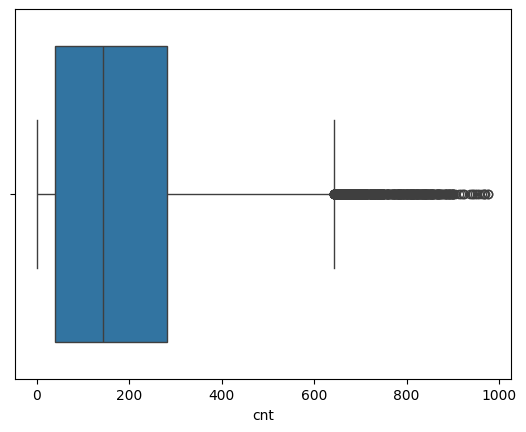

Outliers:
        instant      dteday  season  yr  mnth  hr  holiday  weekday  \
5536      5537  2011-08-23       3   0     8  14        0        2   
10358    10359  2012-03-12       1   1     3  17        0        1   
10359    10360  2012-03-12       1   1     3  18        0        1   
10382    10383  2012-03-13       1   1     3  17        0        2   
10383    10384  2012-03-13       1   1     3  18        0        2   
...        ...         ...     ...  ..   ...  ..      ...      ...   
16885    16886  2012-12-11       4   1    12   8        0        2   
16909    16910  2012-12-12       4   1    12   8        0        3   
16933    16934  2012-12-13       4   1    12   8        0        4   
17053    17054  2012-12-18       4   1    12   8        0        2   
17077    17078  2012-12-19       4   1    12   8        0        3   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
5536            1           1  0.72  0.6515  0.30     0.0896     149   
1035

In [9]:
sns.boxplot(x=hourly_df['cnt'])
plt.show()

Q1 = hourly_df['cnt'].quantile(0.25)
Q3 = hourly_df['cnt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = hourly_df[(hourly_df['cnt'] < lower_bound) | (hourly_df['cnt'] > upper_bound)]
print("Outliers:\n", outliers)


- its best not to remove this since outliers are rush hour times on workdays which is an important piece of information
- removed on another variable for searching non rush hour trends

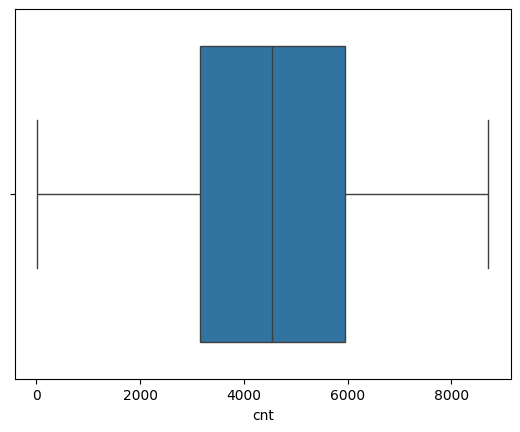

Outliers:
 Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [10]:
sns.boxplot(x=daily_df['cnt'])
plt.show()

Q1 = daily_df['cnt'].quantile(0.25)
Q3 = daily_df['cnt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = daily_df[(daily_df['cnt'] < lower_bound) | (daily_df['cnt'] > upper_bound)]
print("Outliers:\n", outliers)

### Cleaning Data

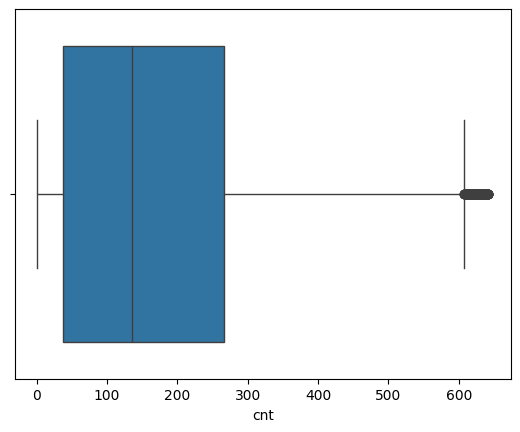

In [11]:
unrushed_hourly_df = hourly_df.copy()

Q1 = unrushed_hourly_df['cnt'].quantile(0.25)
Q3 = unrushed_hourly_df['cnt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

unrushed_hourly_df.drop(unrushed_hourly_df[unrushed_hourly_df['cnt'] < lower_bound].index, inplace=True)
unrushed_hourly_df.drop(unrushed_hourly_df[unrushed_hourly_df['cnt'] > upper_bound].index, inplace=True)

sns.boxplot(x=unrushed_hourly_df['cnt'])
plt.show()

In [12]:
daily_df['weathersit'] = daily_df['weathersit'].map({
    1: 'Clear',
    2: 'Mist + Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Ice'
})

daily_df['season'] = daily_df['season'].map({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

daily_df['holiday'] = daily_df['holiday'].map({
    0: 'Non-Holiday',
    1: 'Holiday'
})

daily_df['workingday'] = daily_df['workingday'].map({
    0: 'Non-Working Day',
    1: 'Working Day'
})

# converted ints to categories
daily_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,Non-Holiday,6,Non-Working Day,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,1,Non-Holiday,0,Non-Working Day,Mist + Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,1,Non-Holiday,1,Working Day,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,1,Non-Holiday,2,Working Day,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,1,Non-Holiday,3,Working Day,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [13]:
hourly_df['weathersit'] = hourly_df['weathersit'].map({
    1: 'Clear',
    2: 'Mist + Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Ice'
})

hourly_df['season'] = hourly_df['season'].map({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

hourly_df['holiday'] = hourly_df['holiday'].map({
    0: 'Non-Holiday',
    1: 'Holiday'
})

hourly_df['workingday'] = hourly_df['workingday'].map({
    0: 'Non-Working Day',
    1: 'Working Day'
})

# converted ints to categories
hourly_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,Non-Holiday,6,Non-Working Day,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,1,1,Non-Holiday,6,Non-Working Day,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,1,2,Non-Holiday,6,Non-Working Day,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,1,3,Non-Holiday,6,Non-Working Day,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,1,4,Non-Holiday,6,Non-Working Day,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [14]:
unrushed_hourly_df['weathersit'] = unrushed_hourly_df['weathersit'].map({
    1: 'Clear',
    2: 'Mist + Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Ice'
})

unrushed_hourly_df['season'] = unrushed_hourly_df['season'].map({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

unrushed_hourly_df['holiday'] = unrushed_hourly_df['holiday'].map({
    0: 'Non-Holiday',
    1: 'Holiday'
})

unrushed_hourly_df['workingday'] = unrushed_hourly_df['workingday'].map({
    0: 'Non-Working Day',
    1: 'Working Day'
})

# converted ints to categories
unrushed_hourly_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,Non-Holiday,6,Non-Working Day,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,1,1,Non-Holiday,6,Non-Working Day,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,1,2,Non-Holiday,6,Non-Working Day,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,1,3,Non-Holiday,6,Non-Working Day,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,1,4,Non-Holiday,6,Non-Working Day,Clear,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore ...

In [15]:
hourly_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,Non-Holiday,6,Non-Working Day,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,1,1,Non-Holiday,6,Non-Working Day,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,1,2,Non-Holiday,6,Non-Working Day,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,1,3,Non-Holiday,6,Non-Working Day,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,1,4,Non-Holiday,6,Non-Working Day,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [16]:
daily_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,Non-Holiday,6,Non-Working Day,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,1,Non-Holiday,0,Non-Working Day,Mist + Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,1,Non-Holiday,1,Working Day,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,1,Non-Holiday,2,Working Day,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,1,Non-Holiday,3,Working Day,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


changing Dtype of 'dteday'

In [17]:
daily_df['dteday'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 731 entries, 0 to 730
Series name: dteday
Non-Null Count  Dtype 
--------------  ----- 
731 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


In [18]:
daily_df['dteday'] = pd.to_datetime(daily_df['dteday'])
hourly_df['dteday'] = pd.to_datetime(hourly_df['dteday'])
unrushed_hourly_df['dteday'] = pd.to_datetime(unrushed_hourly_df['dteday'])

In [19]:
daily_df['dteday'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 731 entries, 0 to 730
Series name: dteday
Non-Null Count  Dtype         
--------------  -----         
731 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.8 KB


In [20]:
daily_df['day_of_week'] = daily_df['dteday'].dt.day_name()
daily_df['month'] = daily_df['dteday'].dt.month_name()

hourly_df['day_of_week'] = hourly_df['dteday'].dt.day_name()
hourly_df['month'] = hourly_df['dteday'].dt.month_name()

unrushed_hourly_df['day_of_week'] = unrushed_hourly_df['dteday'].dt.day_name()
unrushed_hourly_df['month'] = unrushed_hourly_df['dteday'].dt.month_name()

checking usage for every possible time

In [21]:
hourly_usage = hourly_df.groupby('hr')['cnt'].mean().sort_values(ascending=False)
print("Average bike rentals per hour:\n", hourly_usage)

Average bike rentals per hour:
 hr
17    461.452055
18    425.510989
8     359.011004
16    311.983562
19    311.523352
13    253.661180
12    253.315934
15    251.233196
14    240.949246
20    226.030220
9     219.309491
7     212.064649
11    208.143054
10    173.668501
21    172.314560
22    131.335165
23     87.831044
6      76.044138
0      53.898072
1      33.375691
2      22.869930
5      19.889819
3      11.727403
4       6.352941
Name: cnt, dtype: float64


In [22]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

monthly_usage = daily_df.groupby('month')['cnt'].mean().reindex(month_order)
print("Average bike rentals per month:\n", monthly_usage)

Average bike rentals per month:
 month
January      2176.338710
February     2655.298246
March        3692.258065
April        4484.900000
May          5349.774194
June         5772.366667
July         5563.677419
August       5664.419355
September    5766.516667
October      5199.225806
November     4247.183333
December     3403.806452
Name: cnt, dtype: float64


In [23]:
seasonal_usage = daily_df.groupby('season')['cnt'].mean().sort_values(ascending=False)
print("Average bike rentals on each season:\n", seasonal_usage)

Average bike rentals on each season:
 season
Fall      5644.303191
Summer    4992.331522
Winter    4728.162921
Spring    2604.132597
Name: cnt, dtype: float64


In [24]:
holiday_usage = daily_df.groupby('holiday')['cnt'].mean()
print("Average bike rentals on holidays:\n", holiday_usage)

Average bike rentals on holidays:
 holiday
Holiday        3735.000000
Non-Holiday    4527.104225
Name: cnt, dtype: float64


In [25]:
weekday_usage = daily_df[daily_df['weekday'] <= 5]['cnt'].mean()
weekend_usage = daily_df[daily_df['weekday'] > 5]['cnt'].mean()
print(f"Average bike rentals on weekdays: {weekday_usage}")
print(f"Average bike rentals on weekends: {weekend_usage}")
# more bike rentals on weekends by only a mere 54 rents

Average bike rentals on weekdays: 4496.600638977636
Average bike rentals on weekends: 4550.542857142857


In [26]:
workingday_usage = daily_df.groupby('workingday')['cnt'].mean()
print("Average bike rentals on workdays and non-workdays (both weekends and holidays):\n", workingday_usage)
# more bike rentals on non-workdays, both weekends and holidays

Average bike rentals on workdays and non-workdays (both weekends and holidays):
 workingday
Non-Working Day    4330.168831
Working Day        4584.820000
Name: cnt, dtype: float64


In [27]:
user_type_usage = daily_df[['casual', 'registered']].mean()
print("Average casual and registered pedestrian bike rentals:\n", user_type_usage)

Average casual and registered pedestrian bike rentals:
 casual         848.176471
registered    3656.172367
dtype: float64


In [28]:
weather_conditions = daily_df.groupby('weathersit')['cnt'].mean().sort_values(ascending=False)
print("Average bike rentals on each weather condition:\n", weather_conditions)

Average bike rentals on each weather condition:
 weathersit
Clear              4876.786177
Mist + Cloudy      4035.862348
Light Snow/Rain    1803.285714
Name: cnt, dtype: float64


In [29]:
monthly_data = unrushed_hourly_df.groupby(unrushed_hourly_df['dteday'].dt.month).agg({
    'cnt': 'sum',
    'temp': 'mean',
    'atemp': 'mean',
    'hum': 'mean',
    'windspeed': 'mean'
}).reset_index()

correlation_matrix = monthly_data[['cnt', 'temp', 'atemp', 'hum', 'windspeed']].corr()
print("Correlation matrix:\n", correlation_matrix)

Correlation matrix:
                 cnt      temp     atemp       hum  windspeed
cnt        1.000000  0.928387  0.936565  0.444681  -0.638056
temp       0.928387  1.000000  0.999488  0.263719  -0.586586
atemp      0.936565  0.999488  1.000000  0.273452  -0.586832
hum        0.444681  0.263719  0.273452  1.000000  -0.654629
windspeed -0.638056 -0.586586 -0.586832 -0.654629   1.000000


## Visualization & Explanatory Analysis

### Pertanyaan 1:

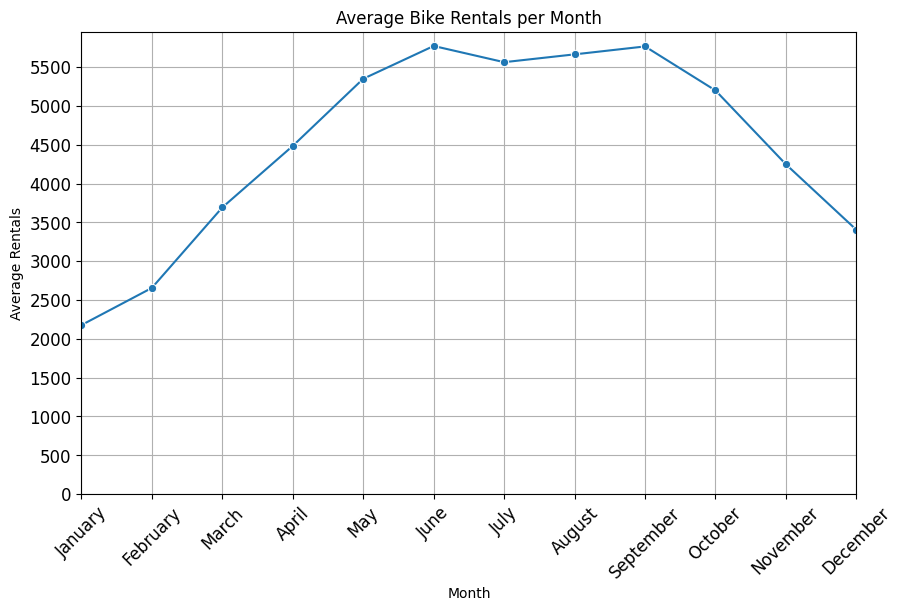

In [30]:
# Monthly Usage Pattern
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_usage.index, y=monthly_usage.values, marker='o')
plt.title('Average Bike Rentals per Month')
plt.xlabel('Month')
plt.ylabel('Average Rentals')
plt.xticks(rotation=45)
plt.xticks(range(12), fontsize=12)
plt.yticks(range(0,6000,500), fontsize=12)
plt.grid(True)
plt.ylim(bottom=0)
plt.xlim(0,11)
plt.show()
# clearly there is a trend here...

* There are more bike rentals during the middle of the year, peaking between june and september

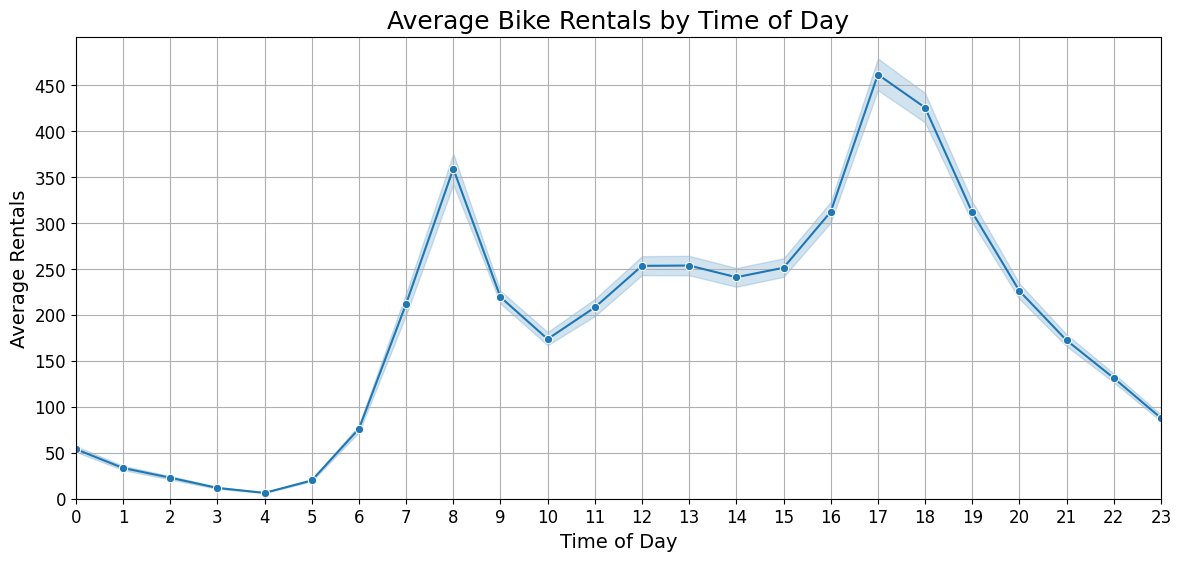

In [31]:
# Usage Patter by Time of the Day
plt.figure(figsize=(14, 6))
sns.lineplot(x='hr', y='cnt', data=hourly_df, marker='o')
plt.title('Average Bike Rentals by Time of Day', fontsize=18)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Average Rentals', fontsize=14)
plt.xticks(range(24), fontsize=12)
plt.yticks(range(0,500,50), fontsize=12)
plt.ylim(bottom=0)
plt.xlim(0, 23) 
plt.grid(True)

plt.show()
# active on mornings and peaks on rush hours (8, 17, 18)

* There are more bike rentals during the day, peaking at rush hours: 8, 17, 18

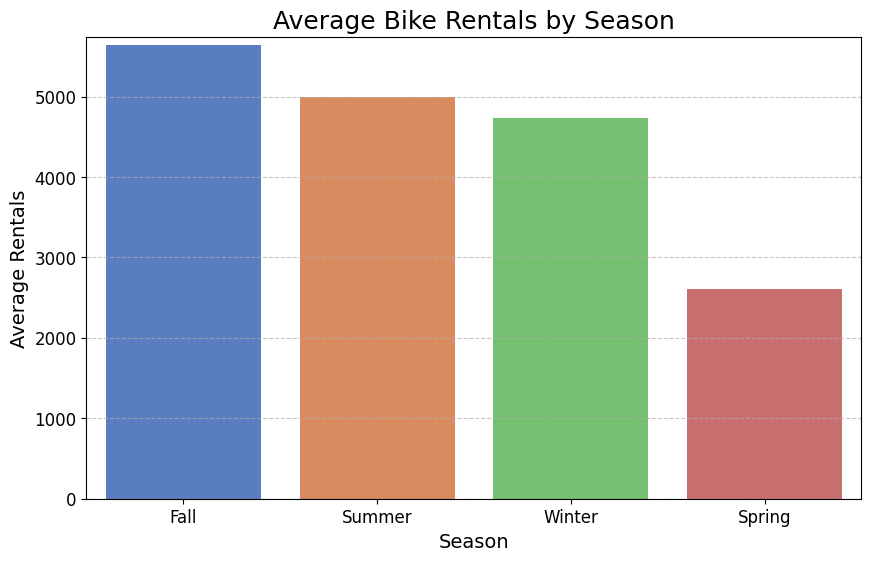

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x=seasonal_usage.index, y=seasonal_usage.values, hue=seasonal_usage.index, palette='muted')
plt.title('Average Bike Rentals by Season', fontsize=18)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Average Rentals', fontsize=14)
plt.ylim(0, seasonal_usage.values.max() + 100)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

* Pedestrians are less likely to use shared bikes during summer, winter, and significantly less in spring

### Pertanyaan 2:

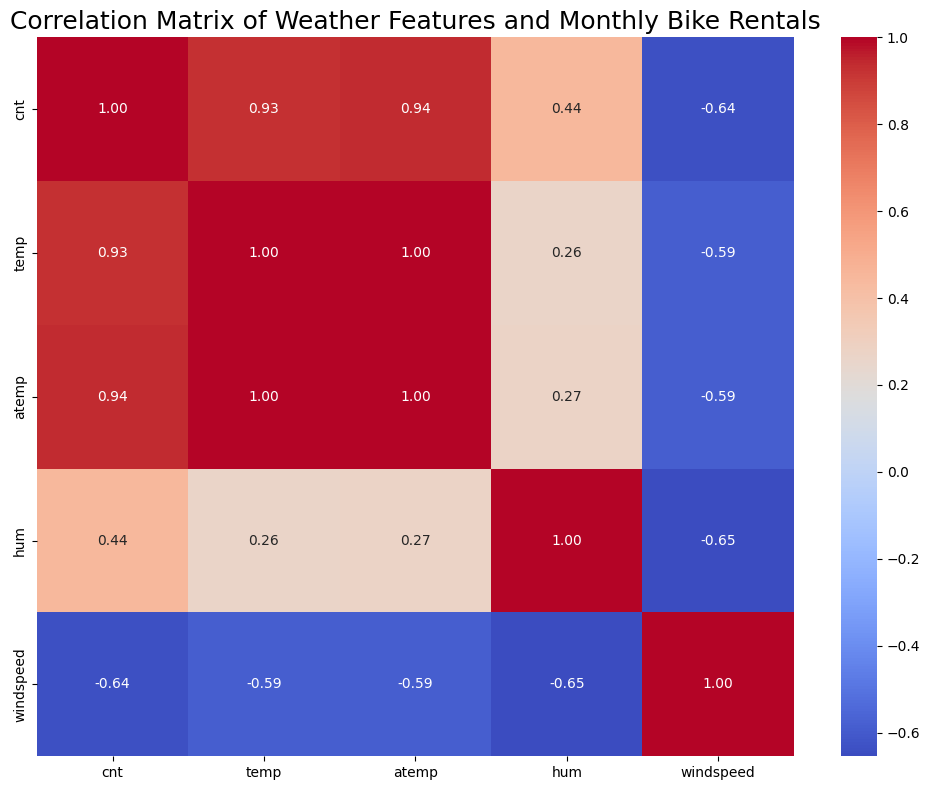

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Weather Features and Monthly Bike Rentals', fontsize=18)
plt.tight_layout()

plt.show()
# temp and atemp is highly correlated to count and with a slight correlation to hum and windspeed

* one true indicator that pedestrians determine using a shared bike is the temperature especially on lower temperatures true by almost 100%
* another less common indicator is the windspeeds, where its better to ride a shared bike during low windspeeds, true by 65%

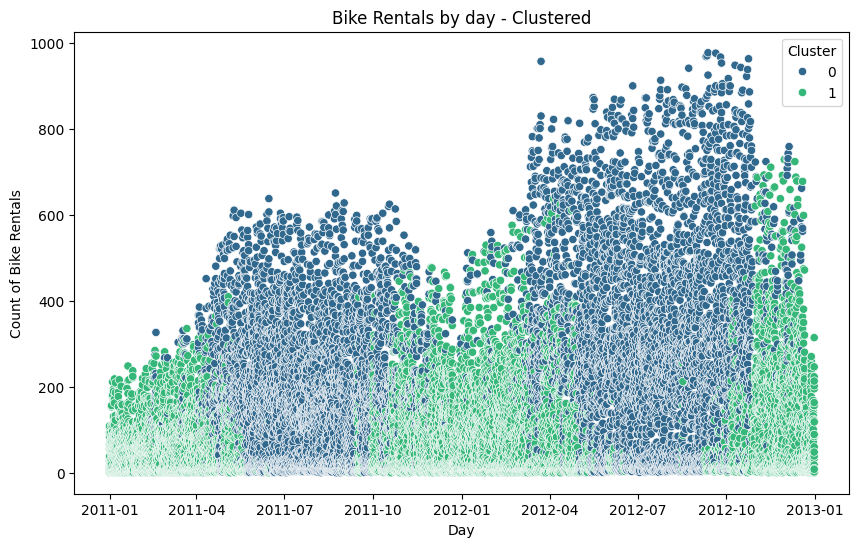

In [ ]:
selected_features = hourly_df[['cnt', 'atemp', 'temp']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(scaled_features)

# Attach the cluster labels to your original dataframe
hourly_df['cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=hourly_df['dteday'], y=hourly_df['cnt'], hue=hourly_df['cluster'], palette='viridis')
plt.title('Bike Rentals by day - Clustered')
plt.xlabel('Day')
plt.ylabel('Count of Bike Rentals')
plt.legend(title='Cluster')
plt.show()

# Step 4: Integrate with Streamlit (This pseudocode represents this step)

as you can see this k-means clustering graph, we can group between high and low rent counts using 'cnt', 'atemp', and 'temp' features which indicates its very high correlation 

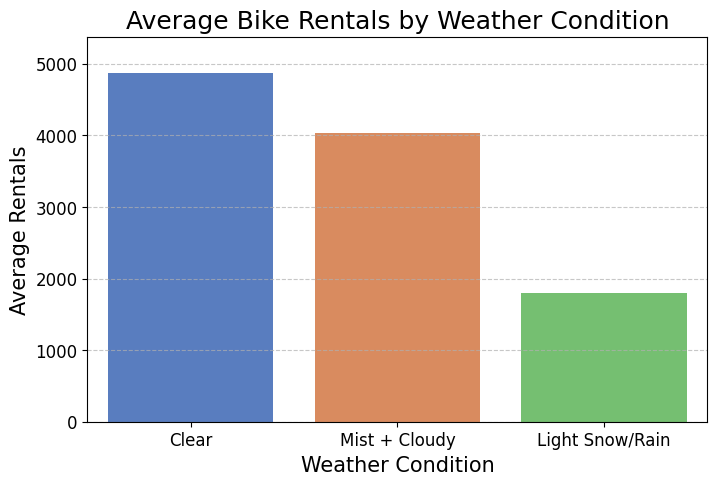

In [34]:
plt.figure(figsize=(8, 5))
sns.barplot(x=weather_conditions.index, y=weather_conditions.values, hue=weather_conditions.index, palette='muted')
plt.title('Average Bike Rentals by Weather Condition', fontsize=18)
plt.xlabel('Weather Condition', fontsize=15)
plt.ylabel('Average Rentals', fontsize=15)
plt.ylim(0, weather_conditions.values.max() + 500)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

* light snow/rain could prevent users from wanting to use shared bikes, and possibly even more so if heavy rain ever occours when looking at the trend
* mist and cloudy conditions also affects rental counts, though not by much

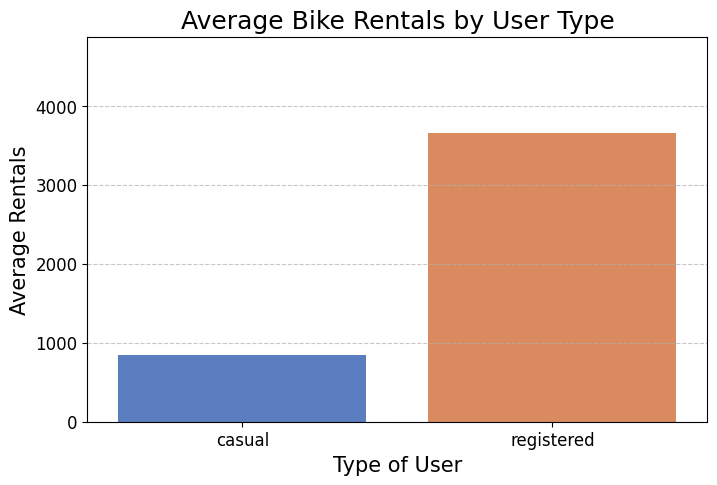

In [35]:
plt.figure(figsize=(8, 5))
sns.barplot(x=user_type_usage.index, y=user_type_usage.values, hue=user_type_usage.index, palette='muted')
plt.title('Average Bike Rentals by User Type', fontsize=18)
plt.xlabel('Type of User', fontsize=15)
plt.ylabel('Average Rentals', fontsize=15)
plt.ylim(0, weather_conditions.values.max())
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Conclusion

- Answering to the first question: "At what day of the year or time/type of day do pedestrians used shared bikes more often than not?", pedestrians tend to use shared bikes more often during the warmer months of the year, particularly from late summer to early fall, with the highest usage in September. Daily usage patterns peak during typical morning and evening commuting hours, suggesting a significant use of bikes for work or school commutes. The seasonal and monthly patterns may be influenced by weather conditions, with less bike usage occurring during the colder, wetter months of the year.

- Answering to the second question: "What might be the cause of pedestrians using shared bikes?", is that the primary cause of pedestrians using shared bikes appears to be related to favorable weather conditions. Warmer temperatures are highly conducive to increased bike rentals, as indicated by the strong positive correlation with temperature. Clear weather conditions also result in more bike usage, as seen by the higher averages compared to adverse weather conditions. However, pedestrians are less likely to use shared bikes during high winds and light snow or rain. The data suggests that apart from practical commuting needs, weather plays a crucial role in influencing the decision to use shared bikes. In addition to that, registered users tend to repetedly rent shared bikes due to their loyalty to use shared bikes, which could also mean that casual users will more often register than not possibly due to convinience.